In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [ ]:
! unzip Fing.zip

In [3]:
train_files = glob.glob("/content/fing/train/*.png")
test_files = glob.glob("/content/fing/test/*.png")

In [4]:
train_files[0]

'/content/fing/train/cf3cb689-68ad-4a1e-ae01-1d5df625fcae_3R.png'

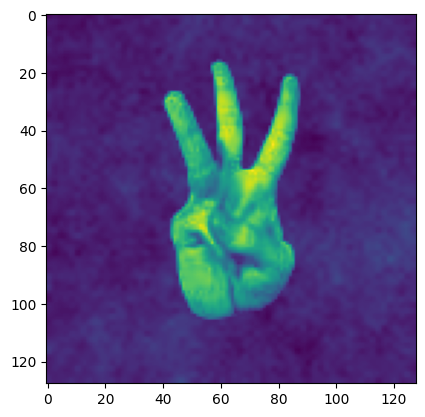

In [5]:
from PIL import Image
im = Image.open(train_files[0])
plt.imshow(im);

In [6]:
im_array = np.array(im)

In [7]:
im_array.shape

(128, 128)

In [8]:
X_train = np.zeros((len(train_files), 128, 128))
Y_train = np.zeros((len(train_files), 6))

In [9]:
for i, trf in enumerate(train_files):
    im = Image.open(trf)
    X_train[i, :, :] = np.array(im)
    Y_train[i, int(trf[-6:-5])] = 1

In [10]:
X_test = np.zeros((len(test_files), 128, 128))
Y_test = np.zeros((len(test_files), 6))

In [11]:
for i, tsf in enumerate(test_files):
    im = Image.open(tsf)
    X_test[i, :, :] = np.array(im)
    Y_test[i, int(tsf[-6:-5])] = 1

In [12]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 4000
number of test examples = 1000
X_train shape: (4000, 128, 128)
Y_train shape: (4000, 6)
X_test shape: (1000, 128, 128)
Y_test shape: (1000, 6)


### Train model

In [13]:
import tensorflow as tf

In [14]:
tf.__version__

'2.15.0'

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [16]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=(1, 1), input_shape = (128, 128, 1), padding='same', activation = 'relu'))
model.add(MaxPool2D((8,8)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 6)                 150534    
                                                                 
Total params: 225030 (879.02 KB)
Trainable params: 225030 (879.02 KB)
Non-trainable params: 0 (0.00 Byte)
________________

#### Scale data

In [17]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)/255
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)/255

In [18]:
X_train[0]

array([[[0.13333333],
        [0.14117647],
        [0.15686275],
        ...,
        [0.19215686],
        [0.18823529],
        [0.18431373]],

       [[0.14901961],
        [0.15686275],
        [0.16862745],
        ...,
        [0.18823529],
        [0.18823529],
        [0.18823529]],

       [[0.18039216],
        [0.18039216],
        [0.18431373],
        ...,
        [0.18039216],
        [0.18823529],
        [0.19215686]],

       ...,

       [[0.20784314],
        [0.20392157],
        [0.19607843],
        ...,
        [0.22745098],
        [0.20392157],
        [0.19607843]],

       [[0.21568627],
        [0.20784314],
        [0.19607843],
        ...,
        [0.20392157],
        [0.20392157],
        [0.20392157]],

       [[0.21960784],
        [0.21176471],
        [0.2       ],
        ...,
        [0.19215686],
        [0.2       ],
        [0.20392157]]])

In [19]:
model.compile('SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = X_train, y = Y_train, batch_size = 128, epochs = 10, validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 6s 84ms/step - loss: 1.7772 - accuracy: 0.2056 - val_loss: 1.7601 - val_accuracy: 0.1713
Epoch 2/10
25/25 [==============================] - 1s 38ms/step - loss: 1.7400 - accuracy: 0.2759 - val_loss: 1.7212 - val_accuracy: 0.4013
Epoch 3/10
25/25 [==============================] - 1s 41ms/step - loss: 1.6914 - accuracy: 0.5069 - val_loss: 1.6619 - val_accuracy: 0.5638
Epoch 4/10
25/25 [==============================] - 1s 39ms/step - loss: 1.6145 - accuracy: 0.6687 - val_loss: 1.5583 - val_accuracy: 0.7138
Epoch 5/10
25/25 [==============================] - 1s 46ms/step - loss: 1.4770 - accuracy: 0.8353 - val_loss: 1.3869 - val_accuracy: 0.7750
Epoch 6/10
25/25 [==============================] - 1s 47ms/step - loss: 1.2389 - accuracy: 0.9016 - val_loss: 1.0742 - val_accuracy: 0.8850
Epoch 7/10
25/25 [==============================] - 1s 49ms/step - loss: 0.9018 - accuracy: 0.9147 - val_loss: 0.7136 - val_accuracy: 0.9438
Epoch 8/10
25

In [20]:
Y_pred_test = model.predict(X_test)

32/32 [==============================] - 0s 8ms/step


#### Convert and save model

In [23]:
cnn_model = model

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)

In [25]:
tflite_model = converter.convert()
open("converted_model_fingers_cnn.tflite", "wb").write(tflite_model)

902924

In [26]:
model.save("FingerCount.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 93ms/step
3


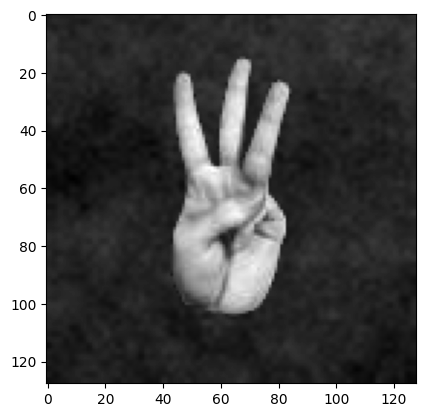

In [40]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale
img2fing = image.load_img("/content/3.png", target_size=(128, 128), color_mode="grayscale")
img2fing = np.asarray(img2fing)
plt.imshow(img2fing, cmap="gray")  # Use a grayscale colormap for display
img2fing = np.expand_dims(img2fing, axis=0)

from keras.models import load_model
saved_model = load_model("FingerCount.h5")
output = saved_model.predict(img2fing)
# Get the index of the maximum value in the output array
predicted_class = np.argmax(output)

# Print the predicted class
print(predicted_class+1)